<a href="https://colab.research.google.com/github/ahaque12/fiddler-save-pizza/blob/main/fiddler_save_pizza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fiddler on the Proof -- Can You Save the Pizza?

https://thefiddler.substack.com/p/can-you-save-the-pizza

I have a slice of uneaten pizza that I’d like to wrap up in aluminum foil before storing in the fridge. The bad news is that I’m all out of foil. The good news is that my unusual neighbor has huge sheets of foil, although I’m not sure why.

I knock on my neighbor’s door, and they’re willing to give me some of their foil in exchange for babysitting their pet snake. For every square inch of foil I borrow, I have to babysit this snake an additional minute. Needless to say, I hate snakes, and I want to request the bare minimum of foil that I need.

The slice in question is an equilateral triangle with a side length of 10 inches. I specifically want to request the smallest rectangle of foil (by area) such that I can completely cover the slice above and below. I can’t fold the pizza, but I’m allowed to make as many straight folds in the foil as I want, without tearing it.

What is the area of the smallest such rectangle of foil that would do the trick?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import matplotlib.path    as mph
import matplotlib.patches as mpc

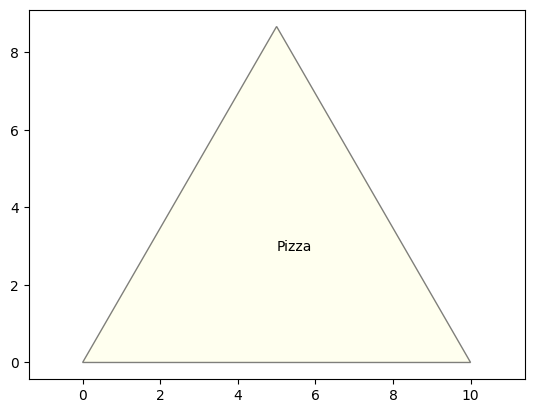

In [4]:
def draw_polygon(points, color='lightyellow', name=''):

  dum = 0

  path_data = []
  for i, point in enumerate(points):
    if i == 0:
      path_data.append([mph.Path.MOVETO, point])
    else:
      path_data.append([mph.Path.LINETO, point])

  path_data.append([mph.Path.CLOSEPOLY, [dum, dum]])

  # 2: create the path structure from the path data
  blackbox = list(zip(*path_data)) # don't worry about this line
  path = mph.Path(blackbox[1], blackbox[0])

  # 3: create the shape structure with colors and lines for MatPlotLib
  shape = mpc.PathPatch(path, facecolor=color, edgecolor='black', alpha=.5)

  # 4: grab the current axis (if none, a new figure is created) and then add the shape to it
  plt.gca().add_patch(shape)
  plt.axis('equal');

  x_c = points[:, 0].sum()/points.shape[0]
  y_c = points[:, 1].sum()/points.shape[0]
  plt.text(x_c, y_c, name, color='black')

draw_polygon(np.array([[0,0],
 [5, 5*np.sqrt(3)],
  [10, 0]]), name='Pizza')

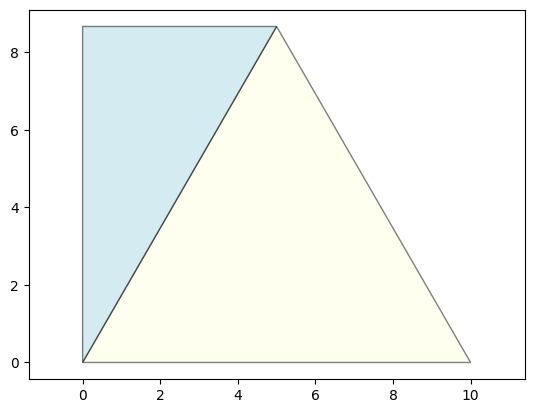

In [6]:
pizza = np.array([[0,0],
                  [5, 5*np.sqrt(3)],
                  [10, 0]])

draw_polygon(pizza)
draw_polygon(np.array([[0,0],
 [5, 5*np.sqrt(3)],
  [0, 5*np.sqrt(3)]]), color='lightblue')

In [7]:
def reflect(points, r, theta):
  b = r[1] - np.tan(theta)*r[0] # r[0]*np.sin(theta) + np.sqrt((r**2).sum())*np.sin(theta)
  r = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
  r_1 = np.linalg.inv(r)
  return (r @ np.array([[1, 0], [0, -1]]) @ r_1 @(points - np.array([0, b])).T).T + np.array([0, b])

# reflect(pizza, np.array([10, 0]), 2*np.pi/3)
reflect(np.array([0, 1]), np.array([0, 0]), np.pi/4)

array([ 1.00000000e+00, -1.79380389e-16])

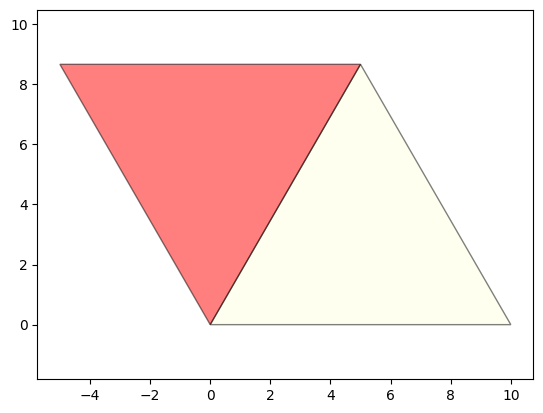

In [8]:
# Test reflection

draw_polygon(pizza)
draw_polygon(reflect(pizza, np.array([0, 0]), np.pi/3), color='red')

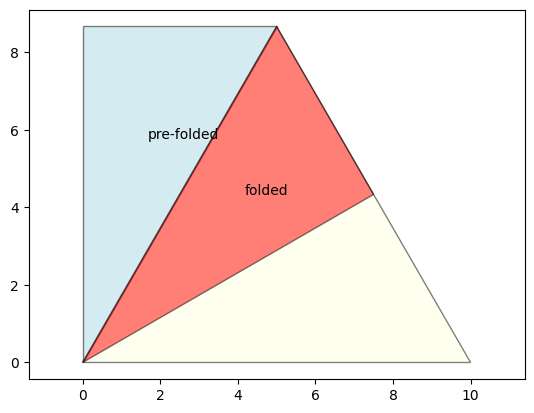

In [9]:
draw_polygon(pizza)
draw_polygon(np.array([[0, 0], [0, 5*np.sqrt(3)], [5, 5*np.sqrt(3)]]), color='lightblue', name='pre-folded')
draw_polygon(reflect(np.array([[0, 0], [0, 5*np.sqrt(3)], [5, 5*np.sqrt(3)]]), np.array([0, 0]), np.pi/3), color='red', name='folded')

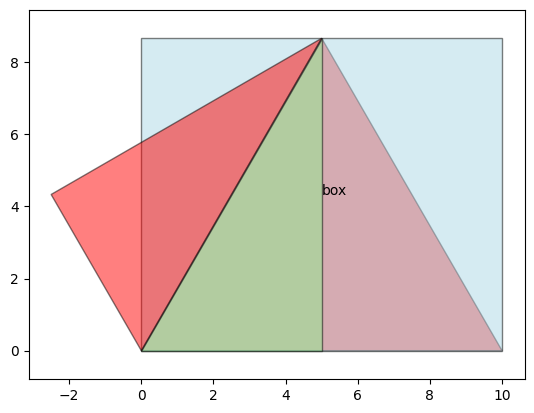

In [10]:
draw_polygon(pizza, color='red')
draw_polygon(np.array([[0,0], [0, 5*np.sqrt(3)], [10, 5*np.sqrt(3)], [10, 0]]), color='lightblue', name='box')
draw_polygon(np.array([[0, 0], [5, 0], [5, 5*np.sqrt(3)]]), color='lightgreen')
draw_polygon(reflect(np.array([[0, 0], [5, 0], [5, 5*np.sqrt(3)]]), np.array([0, 0]), np.pi/3), color='red')

# Solution

Fold the over the sides of the triangle, extend the foil so that it can fold up and cover the bottom.

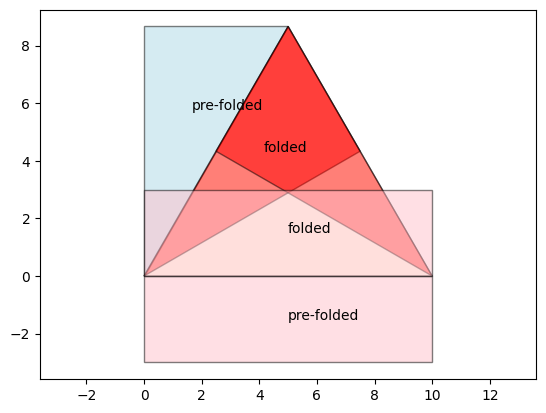

In [11]:
draw_polygon(pizza)
draw_polygon(np.array([[0, 0], [0, 5*np.sqrt(3)], [5, 5*np.sqrt(3)]]), color='lightblue', name='pre-folded')
draw_polygon(reflect(np.array([[0, 0], [0, 5*np.sqrt(3)], [5, 5*np.sqrt(3)]]), np.array([0, 0]), np.pi/3), color='red', name='folded')
draw_polygon(reflect(np.array([[5, 5*np.sqrt(3)], [10, 5*np.sqrt(3)], [10, 0]]), np.array([10, 0]), 2*np.pi/3), color='red')
draw_polygon(np.array([[0, 0], [10, 0], [10, -3], [0, -3]]), color='pink', name='pre-folded')
draw_polygon(reflect(np.array([[0, 0], [10, 0], [10, -3], [0, -3]]), np.array([0, 0]), 0), color='pink', name='folded')

In [12]:
# Reorient rectangle
r = np.array([5, 5*np.sqrt(3)])
theta = np.pi/4
x = r[0] - r[1]
b = r[1] - np.tan(theta)*r[0]
print(x, b)
print(5*np.tan(theta)+b, 5*np.sqrt(3))
(5-x)**2 + 25*3

-3.6602540378443855 3.6602540378443864
8.660254037844386 8.660254037844386


150.0

94.1261709275204


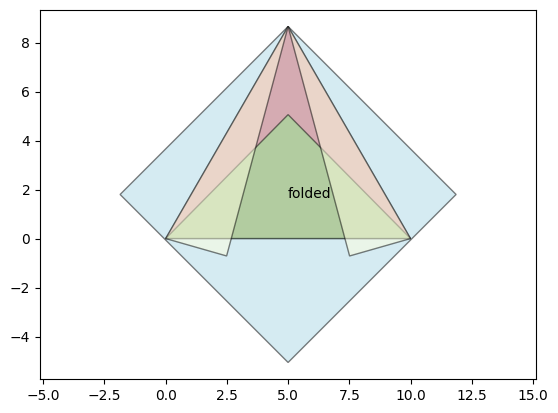

In [13]:
x = -b+1.8
y = np.tan(theta)*x+b
print(np.linalg.norm(np.array([5, 5*np.sqrt(3)]) - np.array([x, y]))**2)

draw_polygon(pizza, color='red')
draw_polygon(np.array([[5,5*np.sqrt(3)], [x, y],
                       reflect(np.array([5, 5*np.sqrt(3)]), np.array([x, y]), 0), [10-x, y]]), color='lightblue')
draw_polygon(reflect(np.array([[0, 0], [10, 0], reflect(np.array([5, 5*np.sqrt(3)]), np.array([x, y]), 0)]), np.array([0,0]), 0), color='lightgreen', name='folded')
draw_polygon(reflect(np.array([[x, y], [5, 5*np.sqrt(3)], [0, 0]]), np.array([0, 0]), np.pi/3))
draw_polygon(reflect(np.array([[10-x, y], [5, 5*np.sqrt(3)], [10, 0]]), np.array([10, 0]), 2*np.pi/3))

In [15]:
def improvement(name, x):
  naive = np.sqrt(3)*10*5*2
  print("This is {} -- {} which is {:0.2f}% better than naive!".format(name, x, -((x / naive) - 1)*100 ))

print("Naive", )
improvement("Best solution", (5*np.sqrt(3)+3)*10)
improvement("The floor (doesn't work)", np.sqrt(3)*10*5)

Naive
This is Best solution -- 116.60254037844385 which is 32.68% better than naive!
This is The floor (doesn't work) -- 86.60254037844385 which is 50.00% better than naive!
